In [ ]:


#DATA PREPROCESSING

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Reading the match stats
matchstats_21_22 = pd.read_csv('D:/Dissertation/2021-22_stats/2021-22_matchstats.csv')

matchstats_22_23 = pd.read_csv('D:/Dissertation/2022-23_stats/22-23_matchstats.csv')

matchstats_23_24 = pd.read_csv('D:/Dissertation/2023-24_stats/23-24_matchstats.csv')


# Display basic information about the datasets
print(matchstats_21_22.info())

print(matchstats_22_23.info())

print(matchstats_23_24.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 112 entries, Date to AvgDist
dtypes: float64(29), int64(73), object(10)
memory usage: 33.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 112 entries, Date to AvgDist
dtypes: float64(29), int64(73), object(10)
memory usage: 33.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 112 entries, Date to AvgDist
dtypes: float64(29), int64(73), object(10)
memory usage: 33.4+ KB
None


In [159]:
# counting the total missing values in the dataset
def count_total_missing_values(df):
    total_missing_values = df.isnull().sum().sum()
    print(f"Total missing values: {total_missing_values}")
    return total_missing_values



# Count total missing values before filling
print("\nTotal missing values before filling:")
count_total_missing_values(matchstats_21_22)
count_total_missing_values(matchstats_22_23)

count_total_missing_values(matchstats_23_24)




# Function to replace missing values in numeric columns with column mean mode for non-numeric columns
def fill_missing_values(df):
    for column in df.columns:
        if df[column].isnull().any():
            if df[column].dtype in [np.float64, np.int64]:
                mean_value = df[column].mean()
                df[column].fillna(mean_value, inplace=True)
            else:
                mode_value = df[column].mode()[0]
                df[column].fillna(mode_value, inplace=True)
    return df


matchstats_21_22 = fill_missing_values(matchstats_21_22)

matchstats_22_23 = fill_missing_values(matchstats_22_23)

matchstats_23_24 = fill_missing_values(matchstats_23_24)



print("\nTotal missing values after filling:")
count_total_missing_values(matchstats_21_22)

count_total_missing_values(matchstats_22_23)

count_total_missing_values(matchstats_23_24)





print("\nData info after filling missing values:")
print(matchstats_21_22.info())

print(matchstats_22_23.info())

print(matchstats_23_24.info())



Total missing values before filling:
Total missing values: 8
Total missing values: 1
Total missing values: 4

Total missing values after filling:
Total missing values: 0
Total missing values: 0
Total missing values: 0

Data info after filling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 112 entries, Date to AvgDist
dtypes: float64(29), int64(73), object(10)
memory usage: 33.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 112 entries, Date to AvgDist
dtypes: float64(29), int64(73), object(10)
memory usage: 33.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 112 entries, Date to AvgDist
dtypes: float64(29), int64(73), object(10)
memory usage: 33.4+ KB
None


In [ ]:
#Validation

In [160]:

datasets = {
    'matchstats_21_22': matchstats_21_22,
    
    'matchstats_22_23': matchstats_22_23,
    
    'matchstats_23_24': matchstats_23_24,
    
}

# Function to validate datasets
def validate_dataset(df, name):
    print(f"\nValidating {name}")
    
    # Check data types
    print("\nData Types:")
    print(df.dtypes)
    
    # Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicates}")
    
    # Check for consistency in numerical columns
    print("\nSummary Statistics:")
    print(df.describe())
    
    # Check domain-specific constraints (example: goals should be non-negative)
    if 'Goals' in df.columns:
        invalid_goals = df[df['Goals'] < 0].shape[0]
        print(f"\nNumber of rows with invalid goals (negative values): {invalid_goals}")
    
    # Check consistency in date columns if available
    if 'Date' in df.columns:
        date_range = pd.to_datetime(df['Date'], errors='coerce')
        print(f"\nDate range: {date_range.min()} to {date_range.max()}")
    
    # Check for unique players in player datasets
    if 'Player' in df.columns:
        unique_players = df['Player'].nunique()
        print(f"\nNumber of unique players: {unique_players}")

# Apply validation to all datasets
for name, df in datasets.items():
    validate_dataset(df, name)



Validating matchstats_21_22

Data Types:
Date                  object
Time                  object
Round                 object
Day                   object
Venue                 object
Result                object
GF                     int64
GA                     int64
Opponent              object
xG                   float64
xGA                  float64
Poss                   int64
Attendance             int64
Captain               object
Formation             object
Referee               object
Gls                    int64
Sh                     int64
SoT                    int64
SoT%                 float64
G/Sh                 float64
G/SoT                float64
Dist                 float64
FK                     int64
PK                     int64
npxG                 float64
npxG/Sh              float64
G-xG                 float64
np:G-xG              float64
Cmp                    int64
Att                    int64
Cmp%                 float64
TotDist                int64
P

C:\Users\lenor\AppData\Local\Temp\ipykernel_10428\401856481.py:33: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_range = pd.to_datetime(df['Date'], errors='coerce')


              GF         GA         xG        xGA       Poss    Attendance        Gls         Sh        SoT       SoT%       G/Sh      G/SoT       Dist         FK         PK       npxG    npxG/Sh       G-xG    np:G-xG         Cmp         Att       Cmp%       TotDist      PrgDist       Cmp.1       Att.1     Cmp%.1       Cmp.2       Att.2     Cmp%.2      Cmp.3      Att.3     Cmp%.3        Ast        xAG         xA         KP      1/3rd        PPA      CrsPA       PrgP     Touches     Def Pen    Def 3rd     Mid 3rd     Att 3rd    Att Pen        Live  AttTakeons       Succ      Succ%       Tkld      Tkld%     Carries  TotDis_poss  PrgDis_poss       PrgC  1/3rd_poss        CPA        Mis        Dis         Rec       PrgR        Tkl       TklW  Def 3_def  Mid 3_def  Att 3_def      Tkl.1      A_def       Tkl%       Lost     Blocks   Shots_bl       Pass        Int    Tkl+Int        Clr        Err       SoTA      Saves       Save%         CS       PSxG    PSxG+/-  Pkatt_goalkeeping       PKsv  

C:\Users\lenor\AppData\Local\Temp\ipykernel_10428\401856481.py:33: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_range = pd.to_datetime(df['Date'], errors='coerce')


In [162]:


# Set display options to avoid truncation
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping
pd.set_option('display.max_rows', None)  # Show all rows

# Summary statistics for match stats
print("Summary statistics for match stats 2021-22:")
print(matchstats_21_22.describe())






Summary statistics for match stats 2021-22:
              GF         GA         xG        xGA       Poss    Attendance        Gls         Sh        SoT       SoT%       G/Sh      G/SoT       Dist         FK         PK       npxG    npxG/Sh       G-xG    np:G-xG         Cmp         Att       Cmp%       TotDist      PrgDist       Cmp.1       Att.1     Cmp%.1       Cmp.2       Att.2     Cmp%.2      Cmp.3      Att.3     Cmp%.3        Ast        xAG         xA         KP      1/3rd        PPA      CrsPA       PrgP     Touches     Def Pen     Def 3rd     Mid 3rd     Att 3rd    Att Pen        Live  AttTakeons       Succ      Succ%       Tkld      Tkld%     Carries  TotDis_poss  PrgDis_poss       PrgC  1/3rd_poss        CPA        Mis        Dis         Rec       PrgR        Tkl       TklW  Def 3_def  Mid 3_def  Att 3_def      Tkl.1      A_def       Tkl%       Lost     Blocks   Shots_bl       Pass        Int    Tkl+Int        Clr        Err       SoTA      Saves       Save%         CS       PS

In [163]:



match_metrics = ['GF', 'GA', 'xG', 'xGA', 'Poss', 'Sh', 'SoT', 'SoT%', 'Cmp', 'Att', 'Cmp%', 'Tkl', 'TklW', 'Shots_bl', 'Int', 'Err', 'Attendance']


match_summary = matchstats_21_22[match_metrics].describe()




# Display the summary statistics
print("Summary statistics for match stats 2021-22:")
print(match_summary)




Summary statistics for match stats 2021-22:
              GF         GA         xG        xGA       Poss         Sh        SoT       SoT%         Cmp         Att       Cmp%        Tkl       TklW   Shots_bl        Int        Err    Attendance
count  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000   38.000000   38.000000  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000     38.000000
mean    2.000000   0.868421   1.663158   0.865789  61.763158  15.342105   5.263158  33.518421  557.631579  654.947368  84.478947  16.342105   8.657895   2.526316   9.131579   0.394737  38391.552632
std     1.506742   1.044187   0.976043   0.606842   9.911594   6.161240   3.037462  13.348567  125.048838  121.150330   4.507061   5.547224   2.056976   2.226825   4.313217   0.679406  12433.447881
min     0.000000   0.000000   0.200000   0.100000  35.000000   4.000000   0.000000   0.000000  293.000000  410.000000  70.700000   6.000000   4.000000   0.000000   

In [164]:
#MATCH-RESULT PIECHART

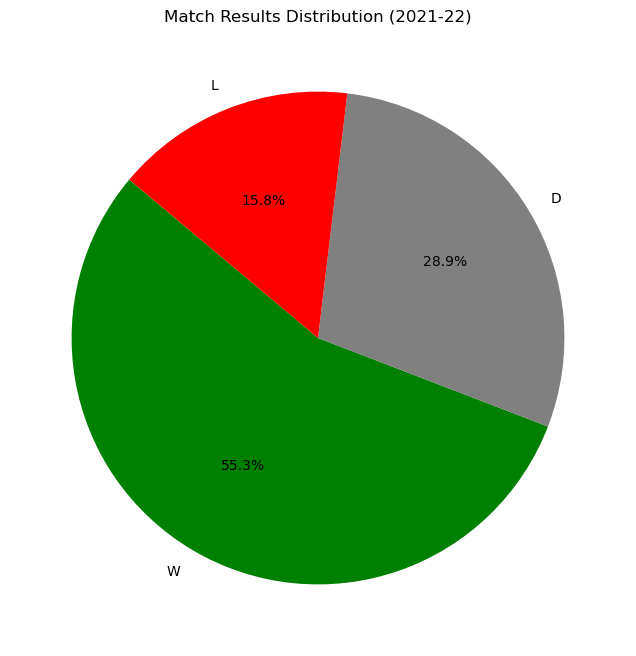

In [165]:
colors = {'W': 'green', 'D': 'gray', 'L': 'red'}


match_results = matchstats_21_22['Result'].value_counts()
pie_colors = [colors[result] for result in match_results.index]

# Match Results Pie Chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(match_results, labels=match_results.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
plt.title('Match Results Distribution (2021-22)')
plt.show()

In [166]:
#GF&GA

In [167]:
#xGvsGF

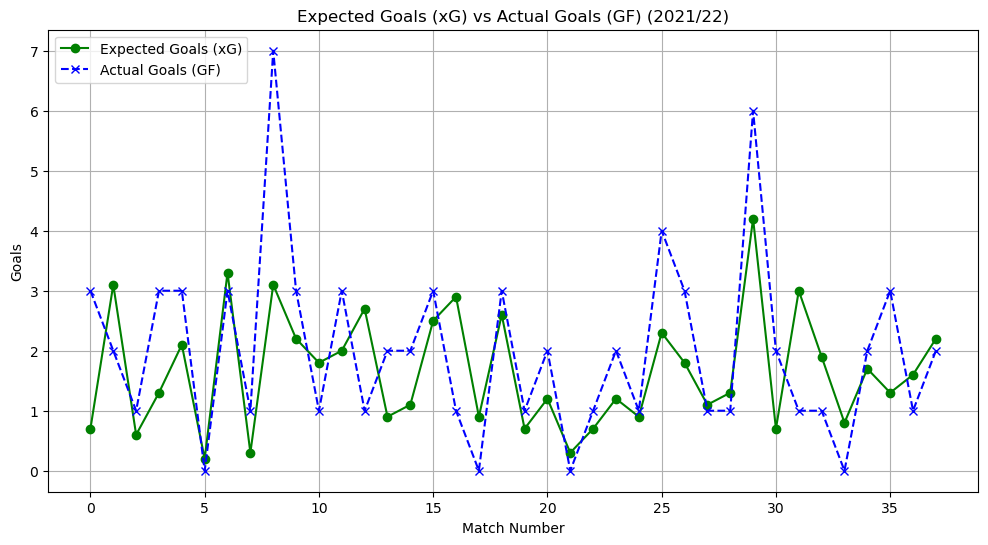

In [168]:
# Line Plot for xG vs GF
plt.figure(figsize=(12, 6))
plt.plot(matchstats_21_22['xG'], marker='o', linestyle='-', label='Expected Goals (xG)', color='green')
plt.plot(matchstats_21_22['GF'], marker='x', linestyle='--', label='Actual Goals (GF)', color='blue')
plt.xlabel('Match Number')
plt.ylabel('Goals')
plt.title('Expected Goals (xG) vs Actual Goals (GF) (2021/22)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


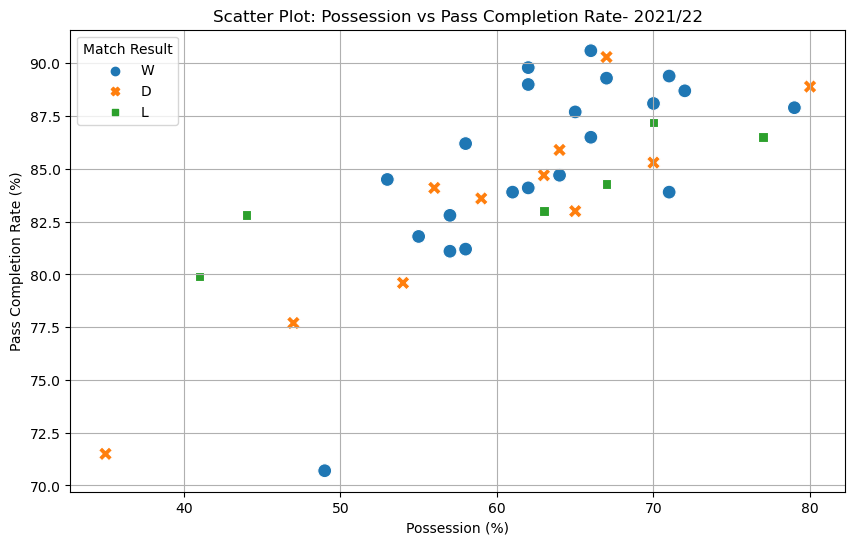

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Possession vs Pass Completion Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Poss', y='Cmp%', data=matchstats_21_22, hue='Result', style='Result', s=100)

plt.title('Scatter Plot: Possession vs Pass Completion Rate- 2021/22')
plt.xlabel('Possession (%)')
plt.ylabel('Pass Completion Rate (%)')
plt.grid(True)
plt.legend(title='Match Result', loc='upper left')
plt.show()


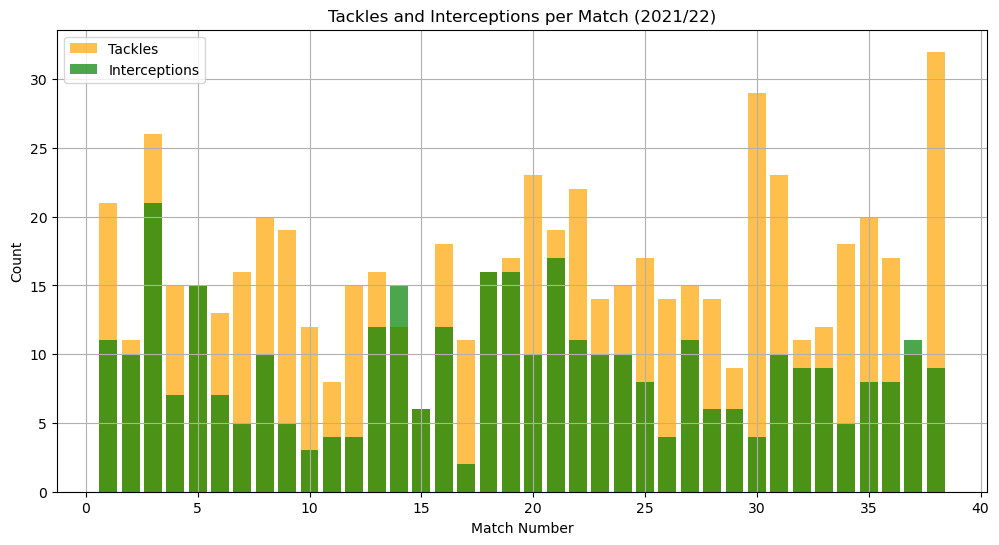

In [170]:
# Bar Plot for Tackles and Interceptions
plt.figure(figsize=(12, 6))
match_numbers = range(1, len(matchstats_21_22) + 1)
plt.bar(match_numbers, matchstats_21_22['Tkl'], alpha=0.7, label='Tackles', color='orange')
plt.bar(match_numbers, matchstats_21_22['Int'], alpha=0.7, label='Interceptions', color='green')
plt.xlabel('Match Number')
plt.ylabel('Count')
plt.title('Tackles and Interceptions per Match (2021/22)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [171]:
#Defensice Players

In [ ]:
#PREDICTIVE MODELLING

In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor  # Import XGBoost
import numpy as np
import random



# Set random seeds
np.random.seed(42)
random.seed(42)

# Features and target
features = ['xG', 'Poss', 'SoT%']
target = 'GF'

# Combine datasets for training
data = pd.concat([matchstats_21_22, matchstats_22_23])
X = data[features]
y = data[target]

# Prepare testing data for 2023/24 season
X_test = matchstats_23_24[features]
y_test = matchstats_23_24[target]

# Cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

# Evaluate models with cross-validation
results = {}
for name, model in models.items():
    cv_mae = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    cv_mse = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    cv_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2')
    
    results[name] = {
        'MAE': -cv_mae.mean(),
        'MSE': -cv_mse.mean(),
        'R2': cv_r2.mean()
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Printing the cross-validation results
print("Cross-Validation Results:")
print(results_df)

# Identify the best model based on MSE
best_model_name = results_df['MSE'].idxmin()
best_model = models[best_model_name]
# Printing the best model based on MSE
print(f"\nBest Model: {best_model_name}")


# Train the best model on the full dataset
best_model.fit(X, y)

# Predict for the 2023/24 season
predictions_2023_24 = best_model.predict(X_test)

# Evaluate predictions for the 2023/24 season
mae_2023_24 = mean_absolute_error(y_test, predictions_2023_24)
mse_2023_24 = mean_squared_error(y_test, predictions_2023_24)
r2_2023_24 = r2_score(y_test, predictions_2023_24)

# Printing the evaluation metrics for the 2023/24 season
print("\nEvaluation Metrics for 2023/24 Season:")
print(f"MAE for 2023/24 season: {mae_2023_24}")
print(f"MSE for 2023/24 season: {mse_2023_24}")
print(f"R2 for 2023/24 season: {r2_2023_24}")

# Calculate total and average predicted goals
total_predicted_goals = predictions_2023_24.sum()
average_predicted_goals_per_match = predictions_2023_24.mean()

# Printing the predicted total and average goals
print(f"\nTotal Predicted Goals for 2023/24 season: {total_predicted_goals}")
print(f"Average Predicted Goals per Match for 2023/24 season: {average_predicted_goals_per_match:.2f}")


# Calculate actual goals
actual_total_goals = matchstats_23_24['GF'].sum()
num_matches = len(matchstats_23_24)
actual_avg_goals_per_match = actual_total_goals / num_matches


# Printing the comparison between predicted and actual goals
print("\nComparison Between Predicted and Actual Goals:")
print(f"Predicted Total Goals: {total_predicted_goals}")
print(f"Actual Total Goals: {actual_total_goals}")


print(f"\nPredicted Average Goals per Match: {average_predicted_goals_per_match}")
print(f"Actual Average Goals per Match: {actual_avg_goals_per_match:.2f}")




Cross-Validation Results:
                        MAE       MSE        R2
Linear Regression  0.827788  1.077914  0.124703
Decision Tree      1.025000  1.682143 -0.643409
Random Forest      0.919964  1.319148 -0.063773
XGBoost            1.023096  1.747830 -0.392164

Best Model: Linear Regression

Evaluation Metrics for 2023/24 Season:
MAE for 2023/24 season: 0.8302575856204312
MSE for 2023/24 season: 0.9849470712534422
R2 for 2023/24 season: 0.5260701196634555

Total Predicted Goals for 2023/24 season: 79.1179443730212
Average Predicted Goals per Match for 2023/24 season: 2.08

Comparison Between Predicted and Actual Goals:
Predicted Total Goals: 79.1179443730212
Actual Total Goals: 77

Predicted Average Goals per Match: 2.0820511677110844
Actual Average Goals per Match: 2.03


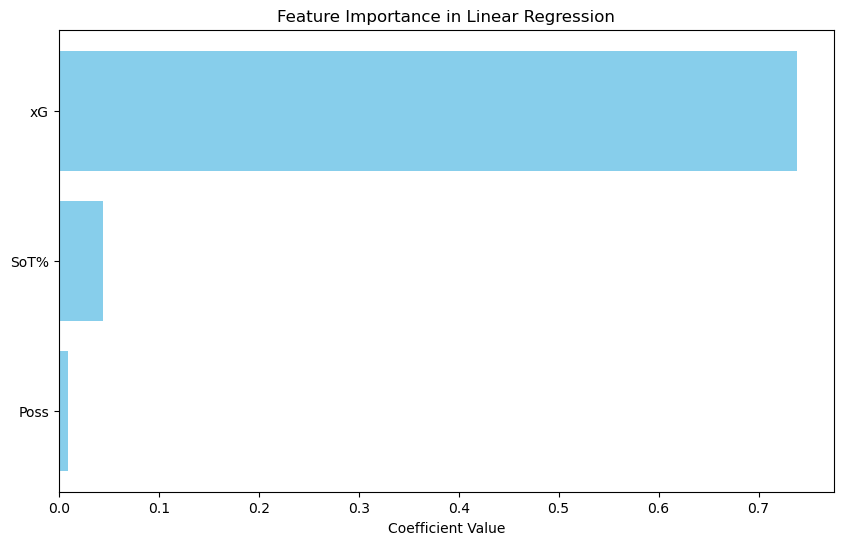

In [174]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model on the entire dataset
linear_regression_model = LinearRegression()
linear_regression_model.fit(X, y)  # Using the full dataset X, y

# Extract the coefficients
coefficients = linear_regression_model.coef_

# Create a DataFrame to tie features with their coefficients
feature_importance_lr = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort the features by the absolute value of their coefficients for better visualization
feature_importance_lr = feature_importance_lr.sort_values(by='Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_lr['Feature'], feature_importance_lr['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()



In [175]:
# Remove extra quotes from the Formation column
matchstats_21_22['Formation'] = matchstats_21_22['Formation'].str.replace('"', '').str.strip()

# Now check the unique formations
print(matchstats_21_22['Formation'].unique())


['3-4-3' '3-5-2' '3-4-1-2' '4-2-2-2' '4-3-3']


In [176]:
# Define the mapping for similar formations
formation_mapping = {
    '3-4-1-2': '3-4-3', '3-4-3': '3-4-3', '3-5-2': '3-5-2', '4-2-2-2': '4-2-2-2', '4-3-3': '4-3-3'
}

# Apply the mapping to the Formation column
matchstats_21_22['Formation'] = matchstats_21_22['Formation'].map(formation_mapping).fillna(matchstats_21_22['Formation'])

# Grouping the data by formation and calculating the required metrics
formation_analysis_with_counts = matchstats_21_22.groupby('Formation').agg({
    'Result': lambda x: (x == 'W').mean(),  # Win rate
    'GF': 'mean',  # Average goals scored
    'GA': 'mean',  # Average goals conceded
    'xG': 'mean',  # Average expected goals
    'Date': 'count'  # Number of games played
}).reset_index()

# Renaming columns for clarity
formation_analysis_with_counts.columns = ['Formation', 'Win Rate', 'Avg Goals Scored (GF)', 'Avg Goals Conceded (GA)', 'Avg Expected Goals (xG)', 'Games Played']

# Display the formation analysis with counts
print(formation_analysis_with_counts)

  Formation  Win Rate  Avg Goals Scored (GF)  Avg Goals Conceded (GA)  Avg Expected Goals (xG)  Games Played
0     3-4-3  0.548387               2.225806                 0.870968                 1.854839            31
1     3-5-2  0.500000               0.500000                 0.500000                 0.250000             2
2   4-2-2-2  0.000000               1.000000                 1.000000                 0.700000             1
3     4-3-3  0.750000               1.250000                 1.000000                 1.125000             4


In [178]:
##ANALYSIS FOR 2022/23 SEASON

In [179]:


# Calculate summary statistics for key metrics from the 2022/23 match stats
summary_stats_22_23 = matchstats_22_23[['GF', 'GA', 'xG', 'Poss', 'Sh', 'SoT', 'SoT%', 'Cmp', 'Att', 'Cmp%', 'Tkl', 'TklW', 'Shots_bl', 'Int', 'Err']].describe()

# Print the summary statistics
print("Summary Statistics for Match Stats 2022/23:")
print(summary_stats_22_23)


Summary Statistics for Match Stats 2022/23:
              GF         GA         xG       Poss         Sh        SoT       SoT%         Cmp         Att       Cmp%        Tkl       TklW   Shots_bl        Int        Err
count  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000   38.000000   38.000000  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000
mean    1.000000   1.236842   1.305263  58.657895  12.657895   3.973684  31.978947  503.868421  600.947368  83.492105  19.473684  11.710526   2.842105   8.973684   0.552632
std     0.958603   1.076386   0.548683   9.248159   4.883930   2.006568  12.442324   90.486425   90.365907   3.698092   5.707922   3.593597   1.732461   4.090112   0.795167
min     0.000000   0.000000   0.300000  36.000000   5.000000   1.000000   7.700000  283.000000  400.000000  70.800000   8.000000   4.000000   0.000000   3.000000   0.000000
25%     0.000000   0.250000   0.900000  52.000000   8.500000   2.000000  21.825000  461.250

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


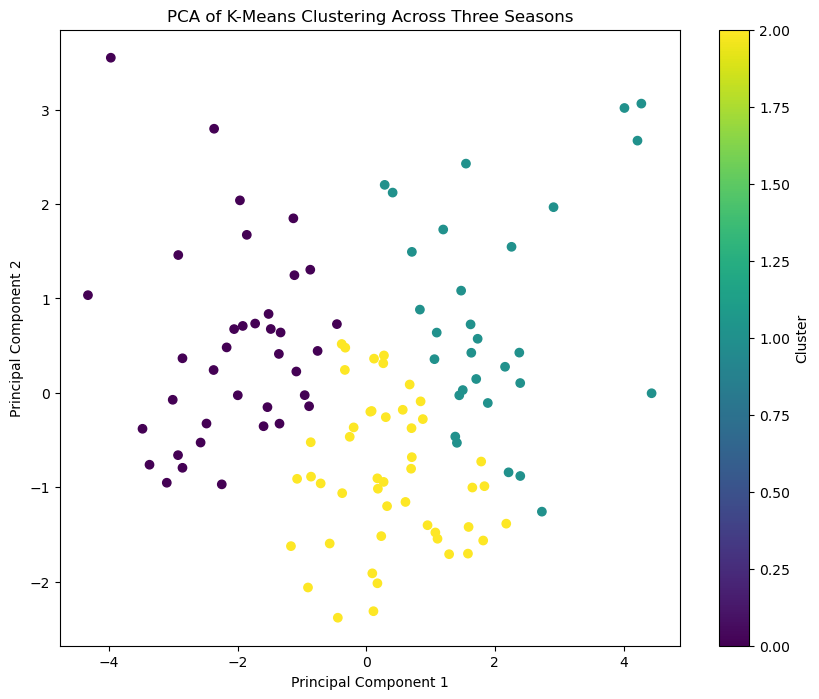

In [223]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt



# Combine data
matchstats_21_22['Season'] = '2021/22'
matchstats_22_23['Season'] = '2022/23'
matchstats_23_24['Season'] = '2023/24'
combined_stats = pd.concat([matchstats_21_22, matchstats_22_23, matchstats_23_24])

# Add a column to identify the season


# Select relevant metrics for clustering
metrics = combined_stats[['xG', 'Poss', 'Sh', 'SoT', 'Cmp', 'Tkl', 'Shots_bl', 'Int']]

# Normalize the data
scaler = StandardScaler()
metrics_normalized = scaler.fit_transform(metrics)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
combined_stats['KMeans_Cluster'] = kmeans.fit_predict(metrics_normalized)

# Calculate the silhouette score for K-Means
kmeans_silhouette = silhouette_score(metrics_normalized, combined_stats['KMeans_Cluster'])


# Visualize the clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(metrics_normalized)

plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=combined_stats['KMeans_Cluster'], cmap='viridis')
plt.title('PCA of K-Means Clustering Across Three Seasons')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()








C:\Users\lenor\AppData\Local\Temp\ipykernel_10428\4230311008.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matchstats_22_23['GF'], shade=True, color="blue", label="Goals Scored (GF)")
C:\Users\lenor\AppData\Local\Temp\ipykernel_10428\4230311008.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matchstats_22_23['GA'], shade=True, color="red", label="Goals Against (GA)")


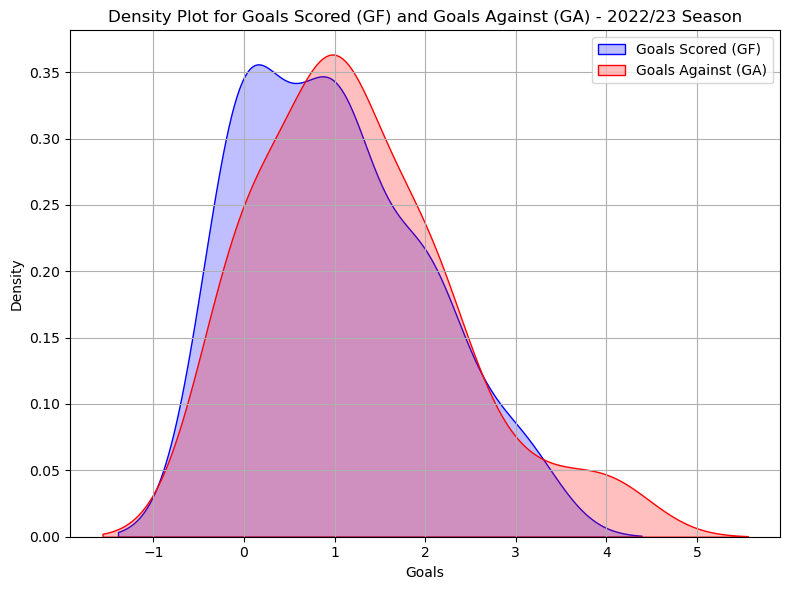

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Generate the density plot comparing GF and GA
plt.figure(figsize=(8, 6))
sns.kdeplot(matchstats_22_23['GF'], shade=True, color="blue", label="Goals Scored (GF)")
sns.kdeplot(matchstats_22_23['GA'], shade=True, color="red", label="Goals Against (GA)")
plt.title('Density Plot for Goals Scored (GF) and Goals Against (GA) - 2022/23 Season')
plt.xlabel('Goals')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
colors = {'W': 'green', 'D': 'gray', 'L': 'red'}


match_results = matchstats_22_23['Result'].value_counts()
pie_colors = [colors[result] for result in match_results.index]

# Match Results Pie Chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(match_results, labels=match_results.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
plt.title('Match Results Distribution (2022-23)')
plt.show()

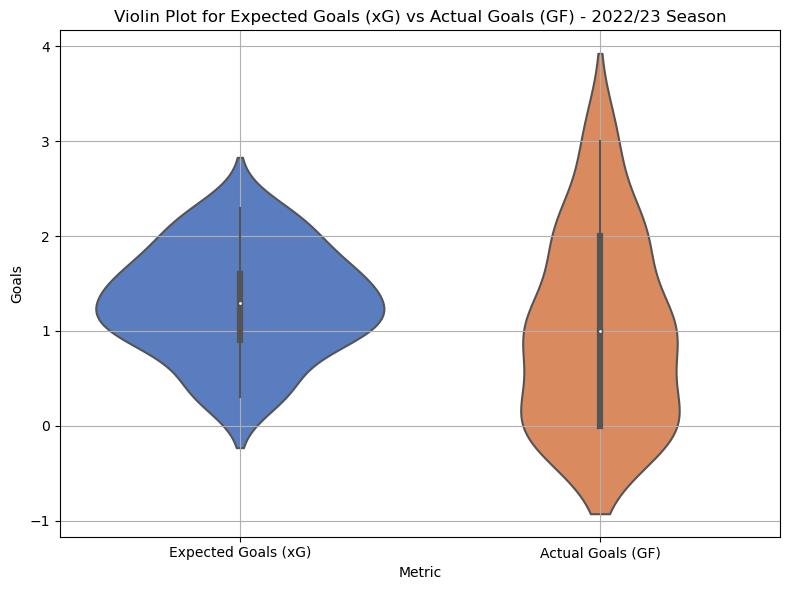

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Prepare the data for the violin plot
data = pd.DataFrame({
    'Expected Goals (xG)': matchstats_22_23['xG'],
    'Actual Goals (GF)': matchstats_22_23['GF']
})


data_melted = data.melt(var_name='Metric', value_name='Goals')

# Generate the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Metric', y='Goals', data=data_melted, palette="muted")
plt.title('Violin Plot for Expected Goals (xG) vs Actual Goals (GF) - 2022/23 Season')
plt.xlabel('Metric')
plt.ylabel('Goals')
plt.grid(True)
plt.tight_layout()
plt.show()



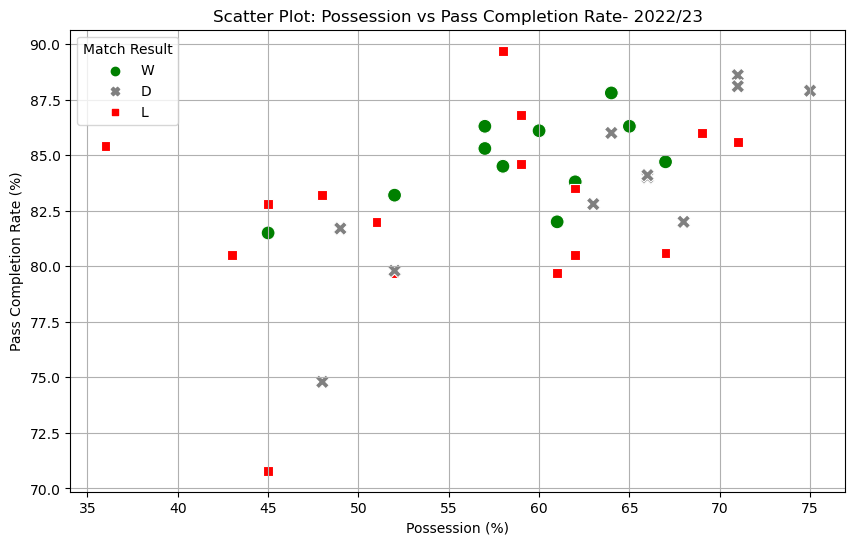

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors for the results
custom_palette = {
    'W': 'green',    # Green for Wins
    'D': 'gray',     # Blue for Draws
    'L': 'red'       # Red for Losses
}

# Scatter plot for Possession vs Pass Completion Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Poss', y='Cmp%', data=matchstats_22_23, hue='Result', style='Result', s=100, palette=custom_palette)



plt.title('Scatter Plot: Possession vs Pass Completion Rate- 2022/23')
plt.xlabel('Possession (%)')
plt.ylabel('Pass Completion Rate (%)')
plt.grid(True)
plt.legend(title='Match Result', loc='upper left')
plt.show()


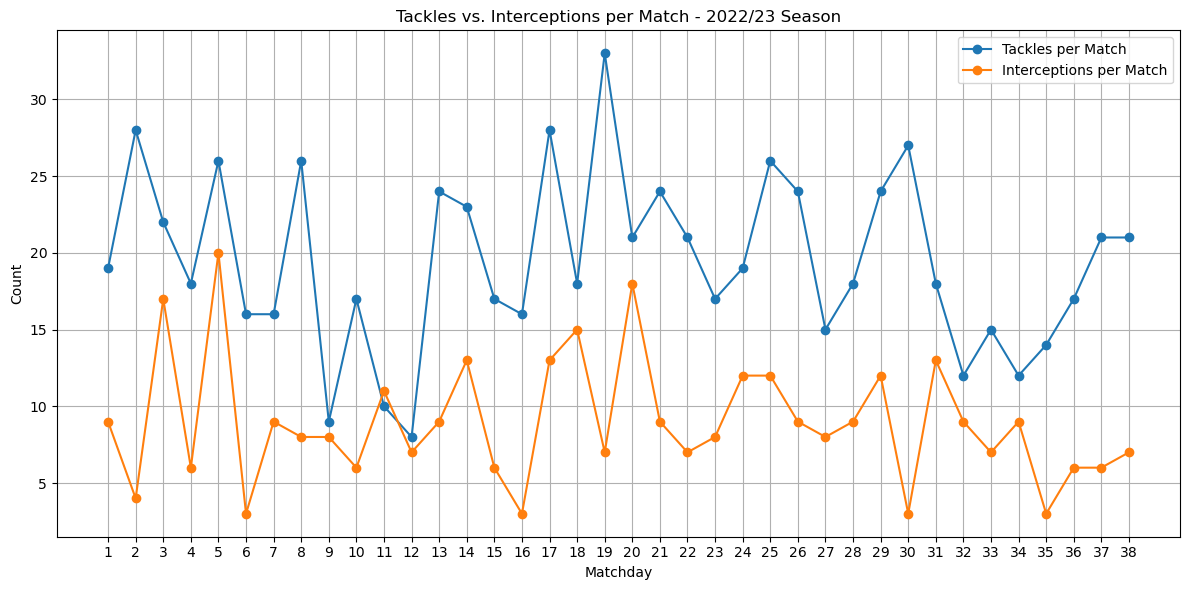

In [20]:
import pandas as pd
import matplotlib.pyplot as plt



# Extract the relevant columns
matchdays = matchstats_22_23.index + 1  # Assuming each row corresponds to a matchday
tackles_per_match = matchstats_22_23['Tkl']
interceptions_per_match = matchstats_22_23['Int']

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(matchdays, tackles_per_match, label='Tackles per Match', marker='o')
plt.plot(matchdays, interceptions_per_match, label='Interceptions per Match', marker='o')

# Adding titles and labels
plt.title('Tackles vs. Interceptions per Match - 2022/23 Season')
plt.xlabel('Matchday')
plt.ylabel('Count')
plt.xticks(matchdays)  # Show every matchday on the x-axis
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [53]:
# Remove extra quotes from the Formation column
matchstats_22_23['Formation'] = matchstats_22_23['Formation'].str.replace('"', '').str.strip()

# Now check the unique formations
print(matchstats_22_23['Formation'].unique())



['3-4-3' '3-5-2' '4-4-2' '4-2-2-2' '3-1-4-2' '4-2-3-1' '3-5-1-1' '4-3-3'
 '3-4-1-2']


In [54]:
# Define the mapping for similar formations
formation_mapping = {
    '3-1-4-2': '3-5-2', '3-4-1-2': '3-5-2', '3-5-1-1': '3-5-2', '3-5-2': '3-5-2',
    '4-2-2-2': '4-4-2', '4-4-2': '4-4-2'
}

# Apply the mapping to the Formation column
matchstats_22_23['Formation'] = matchstats_22_23['Formation'].map(formation_mapping).fillna(matchstats_22_23['Formation'])

# Grouping the data by formation and calculating the required metrics
formation_analysis_with_counts = matchstats_22_23.groupby('Formation').agg({
    'Result': lambda x: (x == 'W').mean(),  # Win rate
    'GF': 'mean',  # Average goals scored
    'GA': 'mean',  # Average goals conceded
    'xG': 'mean',  # Average expected goals
    'Date': 'count'  # Number of games played
}).reset_index()

# Renaming columns for clarity
formation_analysis_with_counts.columns = ['Formation', 'Win Rate', 'Avg Goals Scored (GF)', 'Avg Goals Conceded (GA)', 'Avg Expected Goals (xG)', 'Games Played']

# Display the formation analysis with counts
print(formation_analysis_with_counts)


  Formation  Win Rate  Avg Goals Scored (GF)  Avg Goals Conceded (GA)  Avg Expected Goals (xG)  Games Played
0     3-4-3  0.363636               1.000000                 1.181818                 1.418182            11
1     3-5-2  0.142857               0.714286                 1.285714                 1.400000             7
2   4-2-3-1  0.222222               0.777778                 1.000000                 1.100000             9
3     4-3-3  0.250000               1.250000                 1.500000                 1.287500             8
4     4-4-2  0.666667               1.666667                 1.333333                 1.333333             3


In [ ]:
#Analysis for 2023/24 Season

In [31]:
# Calculate summary statistics for key metrics from the 2022/23 match stats
summary_stats_23_24 = matchstats_23_24[['GF', 'GA', 'xG', 'Poss', 'Sh', 'SoT', 'SoT%', 'Cmp', 'Att', 'Cmp%', 'Tkl', 'TklW', 'Shots_bl', 'Int', 'Err']].describe()

# Print the summary statistics
print("Summary Statistics for Match Stats 2023/24:")
print(summary_stats_23_24)

Summary Statistics for Match Stats 2023/24:
              GF         GA         xG       Poss         Sh        SoT       SoT%         Cmp         Att       Cmp%        Tkl       TklW   Shots_bl        Int        Err
count  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000   38.000000   38.000000  38.000000  38.000000  38.000000  38.000000  38.000000  38.000000
mean    2.026316   1.657895   1.960526  58.605263  14.131579   5.105263  38.336842  527.342105  614.842105  85.165789  17.447368   9.894737   4.368421   7.842105   0.631579
std     1.460967   1.320858   0.922845  12.532206   5.794550   2.719196  16.503848  135.078811  140.873439   3.708302   6.167471   3.964637   2.764847   3.009232   0.997864
min     0.000000   0.000000   0.300000  30.000000   4.000000   1.000000   9.500000  258.000000  333.000000  75.500000   8.000000   5.000000   0.000000   3.000000   0.000000
25%     1.000000   1.000000   1.425000  48.500000  10.000000   3.250000  25.000000  421.750

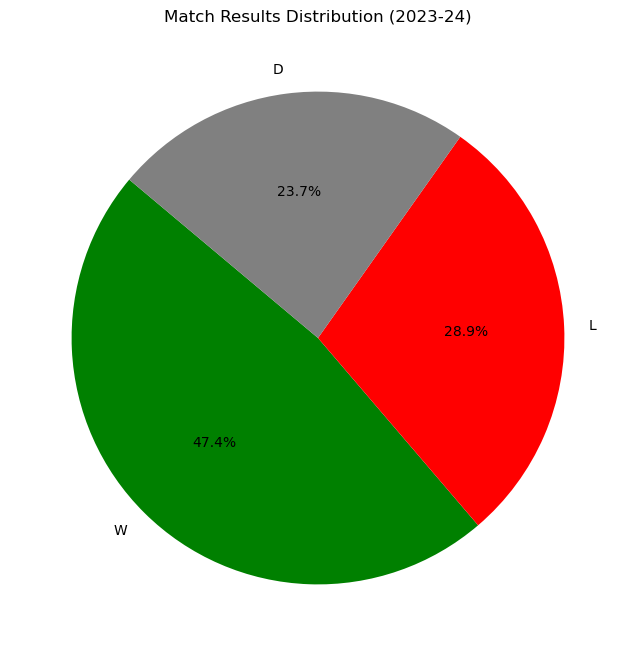

In [30]:
colors = {'W': 'green', 'D': 'gray', 'L': 'red'}


match_results = matchstats_23_24['Result'].value_counts()
pie_colors = [colors[result] for result in match_results.index]

# Match Results Pie Chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(match_results, labels=match_results.index, autopct='%1.1f%%', startangle=140, colors=pie_colors)
plt.title('Match Results Distribution (2023-24)')
plt.show()

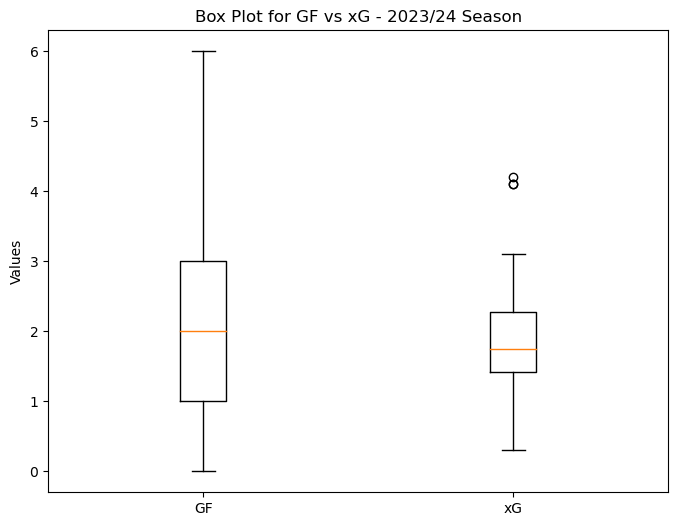

In [35]:
# Create a box plot for xG and GF
plt.figure(figsize=(8, 6))
plt.boxplot([matchstats_23_24['GF'], matchstats_23_24['xG']], labels=['GF', 'xG'])
plt.title('Box Plot for GF vs xG - 2023/24 Season')
plt.ylabel('Values')
plt.show()

C:\Users\lenor\AppData\Local\Temp\ipykernel_10428\3404267684.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matchstats_23_24['GF'], shade=True, color="blue", label="Goals Scored (GF)")
C:\Users\lenor\AppData\Local\Temp\ipykernel_10428\3404267684.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(matchstats_23_24['GA'], shade=True, color="red", label="Goals Against (GA)")


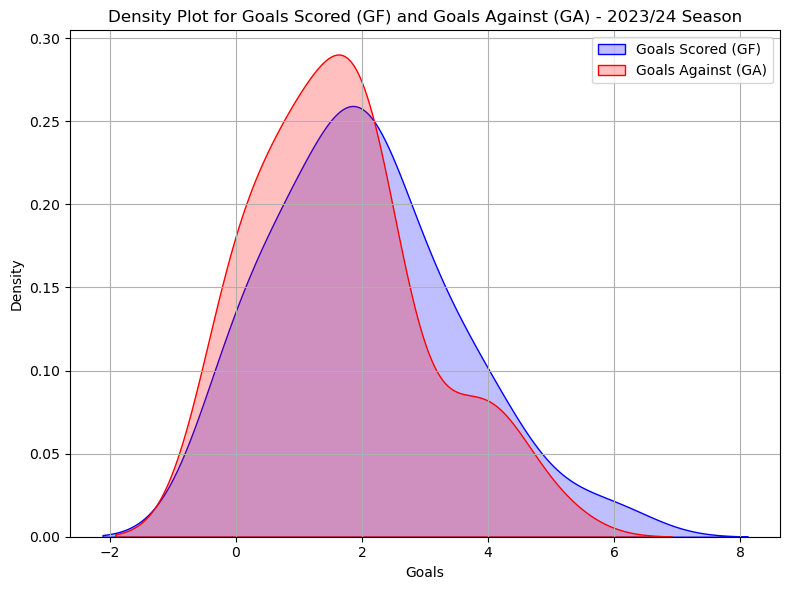

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Generate the density plot comparing GF and GA
plt.figure(figsize=(8, 6))
sns.kdeplot(matchstats_23_24['GF'], shade=True, color="blue", label="Goals Scored (GF)")
sns.kdeplot(matchstats_23_24['GA'], shade=True, color="red", label="Goals Against (GA)")
plt.title('Density Plot for Goals Scored (GF) and Goals Against (GA) - 2023/24 Season')
plt.xlabel('Goals')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


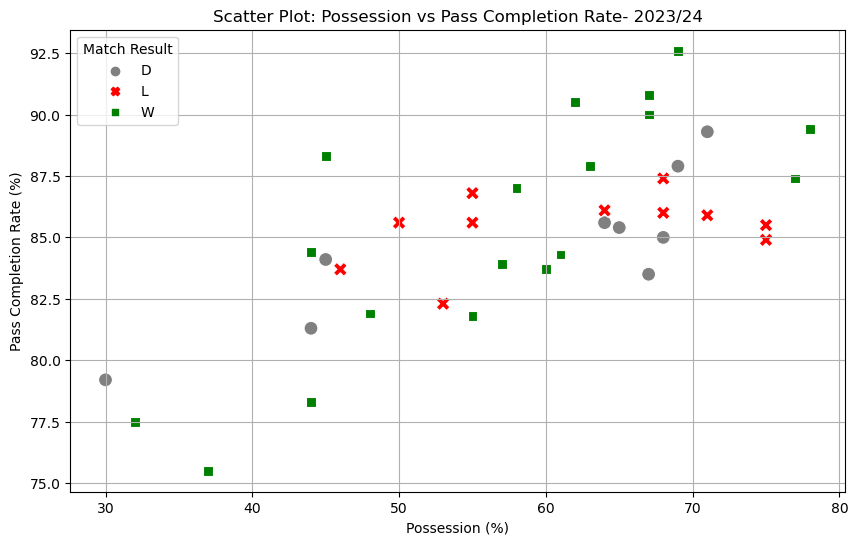

In [38]:
# Define custom colors for the results
custom_palette = {
    'W': 'green',    # Green for Wins
    'D': 'gray',     # Blue for Draws
    'L': 'red'       # Red for Losses
}

# Scatter plot for Possession vs Pass Completion Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Poss', y='Cmp%', data=matchstats_23_24, hue='Result', style='Result', s=100, palette=custom_palette)



plt.title('Scatter Plot: Possession vs Pass Completion Rate- 2023/24')
plt.xlabel('Possession (%)')
plt.ylabel('Pass Completion Rate (%)')
plt.grid(True)
plt.legend(title='Match Result', loc='upper left')
plt.show()

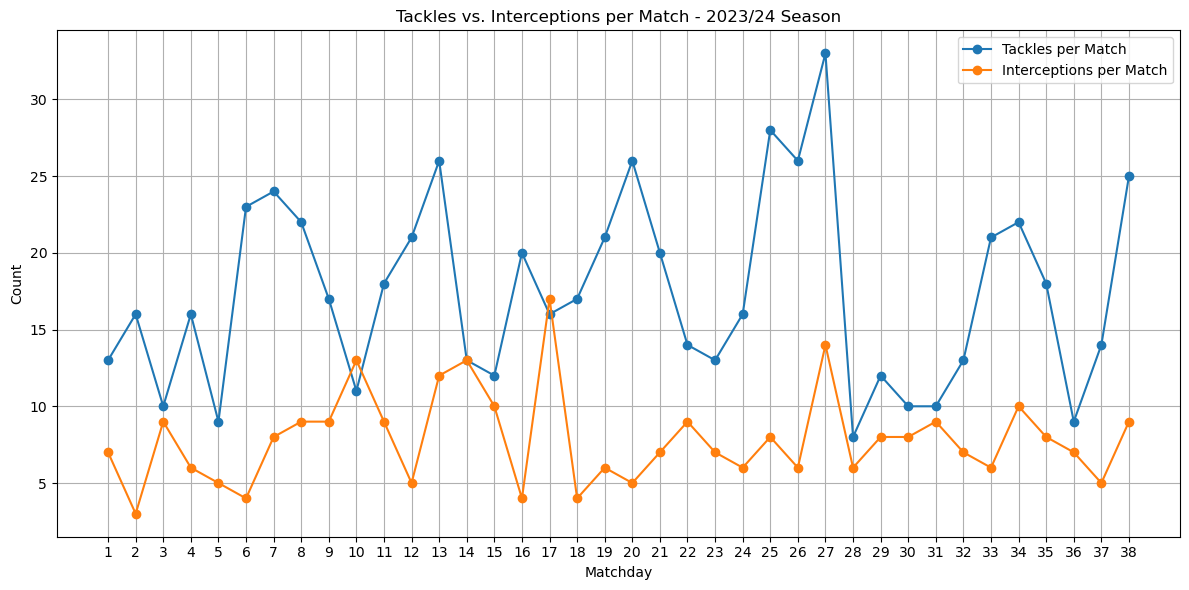

In [39]:
import pandas as pd
import matplotlib.pyplot as plt



# Extract the relevant columns
matchdays = matchstats_23_24.index + 1  # Assuming each row corresponds to a matchday
tackles_per_match = matchstats_23_24['Tkl']
interceptions_per_match = matchstats_23_24['Int']

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(matchdays, tackles_per_match, label='Tackles per Match', marker='o')
plt.plot(matchdays, interceptions_per_match, label='Interceptions per Match', marker='o')

# Adding titles and labels
plt.title('Tackles vs. Interceptions per Match - 2023/24 Season')
plt.xlabel('Matchday')
plt.ylabel('Count')
plt.xticks(matchdays)  # Show every matchday on the x-axis
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
# Grouping the data by formation and calculating the required metrics
formation_analysis_with_counts = matchstats_23_24.groupby('Formation').agg({
    'Result': lambda x: (x == 'W').mean(),  # Win rate
    'GF': 'mean',  # Average goals scored
    'GA': 'mean',  # Average goals conceded
    'xG': 'mean',  # Average expected goals
    'Date': 'count'  # Number of games played
}).reset_index()

# Renaming columns for clarity
formation_analysis_with_counts.columns = ['Formation', 'Win Rate', 'Avg Goals Scored (GF)', 'Avg Goals Conceded (GA)', 'Avg Expected Goals (xG)', 'Games Played']

# Display the formation analysis with counts
print(formation_analysis_with_counts)

   Formation  Win Rate  Avg Goals Scored (GF)  Avg Goals Conceded (GA)  Avg Expected Goals (xG)  Games Played
0    "3-4-3"  0.250000               1.250000                 1.250000                 2.100000             4
1    "3-5-2"  0.000000               2.000000                 2.000000                 1.800000             1
2  "4-2-3-1"  0.483871               2.064516                 1.774194                 1.958065            31
3    "4-3-3"  1.000000               3.000000                 0.500000                 1.800000             2


In [57]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA


matchstats_21_22['Season'] = '2021/22'
matchstats_22_23['Season'] = '2022/23'
matchstats_23_24['Season'] = '2023/24'

# Concatenate all seasons' data
data = pd.concat([matchstats_21_22[['GF', 'GA', 'xG', 'Season']],
                  matchstats_22_23[['GF', 'GA', 'xG', 'Season']],
                  matchstats_23_24[['GF', 'GA', 'xG', 'Season']]])

# Perform MANOVA
manova = MANOVA.from_formula('GF + GA + xG ~ Season', data=data)
print(manova.mv_test())


                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.3372 3.0000 109.0000 71.4161 0.0000
         Pillai's trace 0.6628 3.0000 109.0000 71.4161 0.0000
 Hotelling-Lawley trace 1.9656 3.0000 109.0000 71.4161 0.0000
    Roy's greatest root 1.9656 3.0000 109.0000 71.4161 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
         Season         Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.7709 6.0000 218.0000  5.0468 0.0001
         Pillai's trace 0.2420 6.0000 220.0000  5.0483 0.0001
 Hotelling-Lawley trace 0.

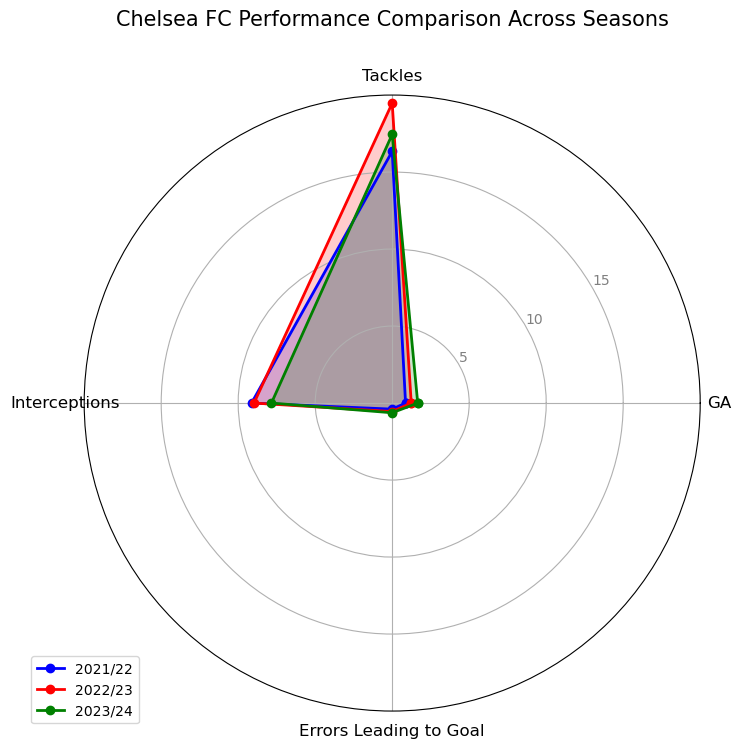

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Calculate mean values for required metrics across the three seasons
metrics = {
    
   
    'GA': [matchstats_21_22['GA'].mean(), matchstats_22_23['GA'].mean(), matchstats_23_24['GA'].mean()],
    'Tackles': [matchstats_21_22['Tkl'].mean(), matchstats_22_23['Tkl'].mean(), matchstats_23_24['Tkl'].mean()],
    'Interceptions': [matchstats_21_22['Int'].mean(), matchstats_22_23['Int'].mean(), matchstats_23_24['Int'].mean()],
    'Errors Leading to Goal': [matchstats_21_22['Err'].mean(), matchstats_22_23['Err'].mean(), matchstats_23_24['Err'].mean()]
}

# Create a DataFrame
df_metrics = pd.DataFrame(metrics, index=['2021/22', '2022/23', '2023/24'])

# Radar chart setup
categories = list(df_metrics.columns)
N = len(categories)


angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Function to add radar chart data for each season with different line styles and markers
def add_to_radar(ax, values, label, color, linestyle, marker):
    values = values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle=linestyle, label=label, color=color, marker=marker)
    ax.fill(angles, values, color=color, alpha=0.2)

# Add data for each season to the radar chart with different line styles and markers
add_to_radar(ax, df_metrics.loc['2021/22'], '2021/22', 'blue', 'solid', 'o')   # solid line, circle marker
add_to_radar(ax, df_metrics.loc['2022/23'], '2022/23', 'red', 'solid', 'o')  # dashed line, square marker
add_to_radar(ax, df_metrics.loc['2023/24'], '2023/24', 'green', 'solid', 'o') # dotted line, triangle marker

# Add labels and title with more space between labels and plot
plt.xticks(angles[:-1], categories, color='black', size=12)
ax.set_rlabel_position(30)
plt.yticks([5, 10, 15], ["5", "10", "15"], color="grey", size=10)
plt.ylim(0, 20)

plt.title('Chelsea FC Performance Comparison Across Seasons', size=15, color='black', y=1.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()


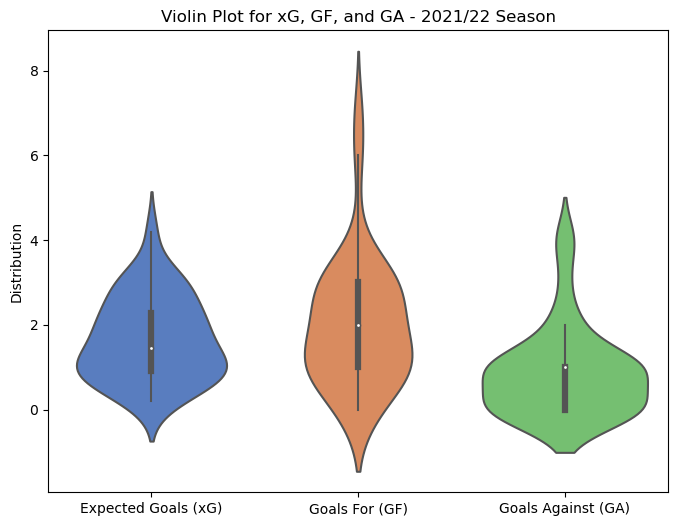

In [63]:
# Prepare the data for the violin plot
data = matchstats_21_22[['xG', 'GF', 'GA']]

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, palette="muted")

# Add labels and title
plt.title('Violin Plot for xG, GF, and GA - 2021/22 Season')
plt.ylabel('Distribution')
plt.xticks([0, 1, 2], ['Expected Goals (xG)', 'Goals For (GF)', 'Goals Against (GA)'])

# Show the plot
plt.show()

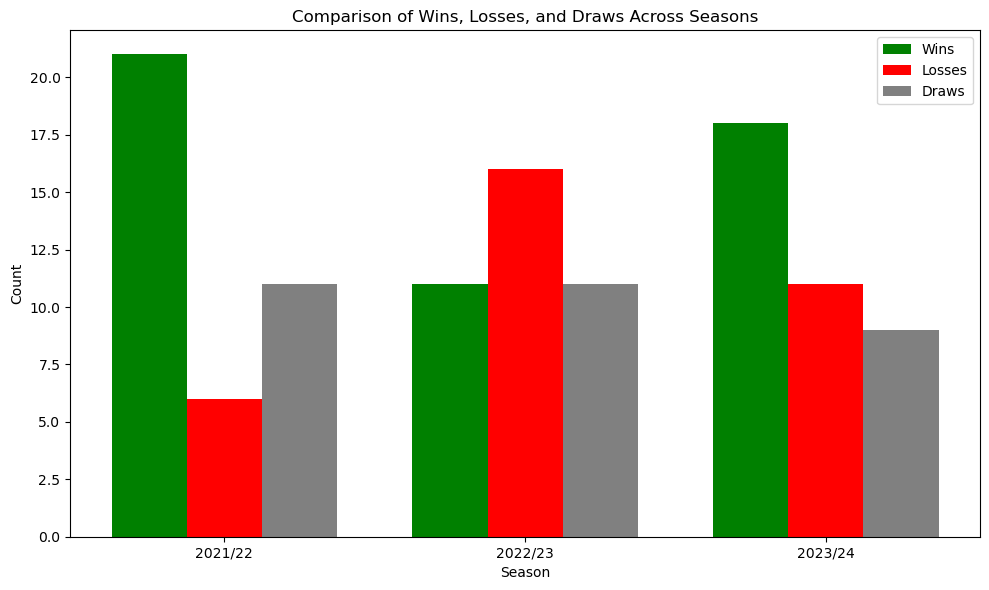

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data for Wins, Losses, and Draws across the three seasons
data = {
    'W': [
        matchstats_21_22[matchstats_21_22['Result'] == 'W'].shape[0],
        matchstats_22_23[matchstats_22_23['Result'] == 'W'].shape[0],
        matchstats_23_24[matchstats_23_24['Result'] == 'W'].shape[0]
    ],
    'L': [
        matchstats_21_22[matchstats_21_22['Result'] == 'L'].shape[0],
        matchstats_22_23[matchstats_22_23['Result'] == 'L'].shape[0],
        matchstats_23_24[matchstats_23_24['Result'] == 'L'].shape[0]
    ],
    'D': [
        matchstats_21_22[matchstats_21_22['Result'] == 'D'].shape[0],
        matchstats_22_23[matchstats_22_23['Result'] == 'D'].shape[0],
        matchstats_23_24[matchstats_23_24['Result'] == 'D'].shape[0]
    ]
}

# Create a DataFrame
df = pd.DataFrame(data, index=['2021/22', '2022/23', '2023/24'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define width of bars
bar_width = 0.25
bar_positions = np.arange(len(df))

# Plot bars
ax.bar(bar_positions, df['W'], width=bar_width, label='Wins', color='green')
ax.bar(bar_positions + bar_width, df['L'], width=bar_width, label='Losses', color='red')
ax.bar(bar_positions + 2 * bar_width, df['D'], width=bar_width, label='Draws', color='gray')

# Set labels, title, and ticks
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('Comparison of Wins, Losses, and Draws Across Seasons')
ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(df.index)

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


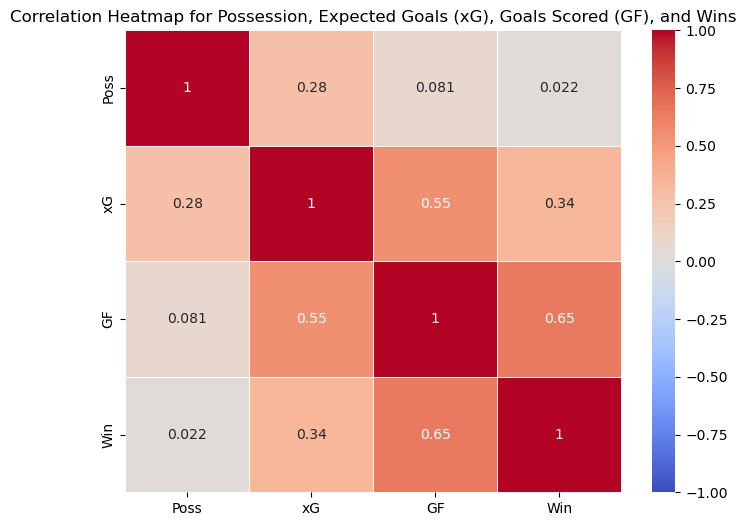

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the datasets
matchstats_21_22['Season'] = '2021/22'
matchstats_22_23['Season'] = '2022/23'
matchstats_23_24['Season'] = '2023/24'
combined_stats = pd.concat([matchstats_21_22, matchstats_22_23, matchstats_23_24])

# Convert 'Result' to numerical (1 for Win, 0 for Loss or Draw)
combined_stats['Win'] = combined_stats['Result'].apply(lambda x: 1 if x == 'W' else 0)

# Select the relevant columns for correlation (Poss, xG, GF, Win)
correlation_data = combined_stats[['Poss', 'xG', 'GF', 'Win']]

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Possession, Expected Goals (xG), Goals Scored (GF), and Wins')
plt.show()



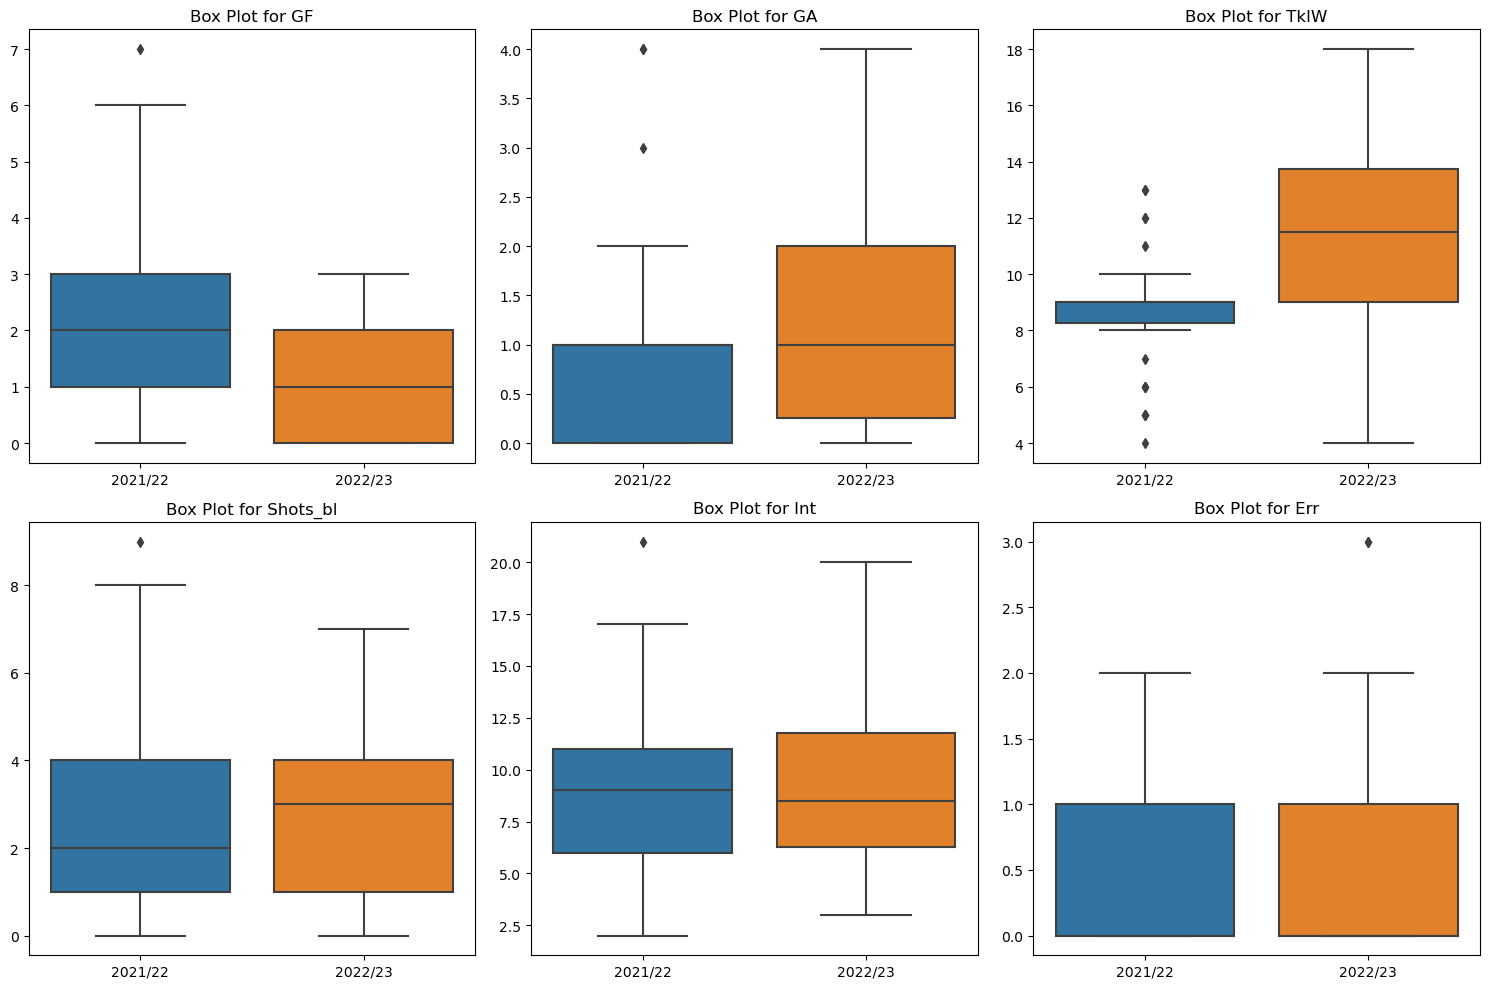

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots to visualize the distribution shapes of the selected metrics for both seasons
metrics_to_plot = ['GF', 'GA', 'TklW', 'Shots_bl', 'Int', 'Err']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Plot box plots for both seasons for each metric
for i, metric in enumerate(metrics_to_plot):
    sns.boxplot(data=[matchstats_21_22[metric], matchstats_22_23[metric]], ax=axes[i])
    axes[i].set_title(f"Box Plot for {metric}")
    axes[i].set_xticklabels(['2021/22', '2022/23'])

plt.tight_layout()
plt.show()


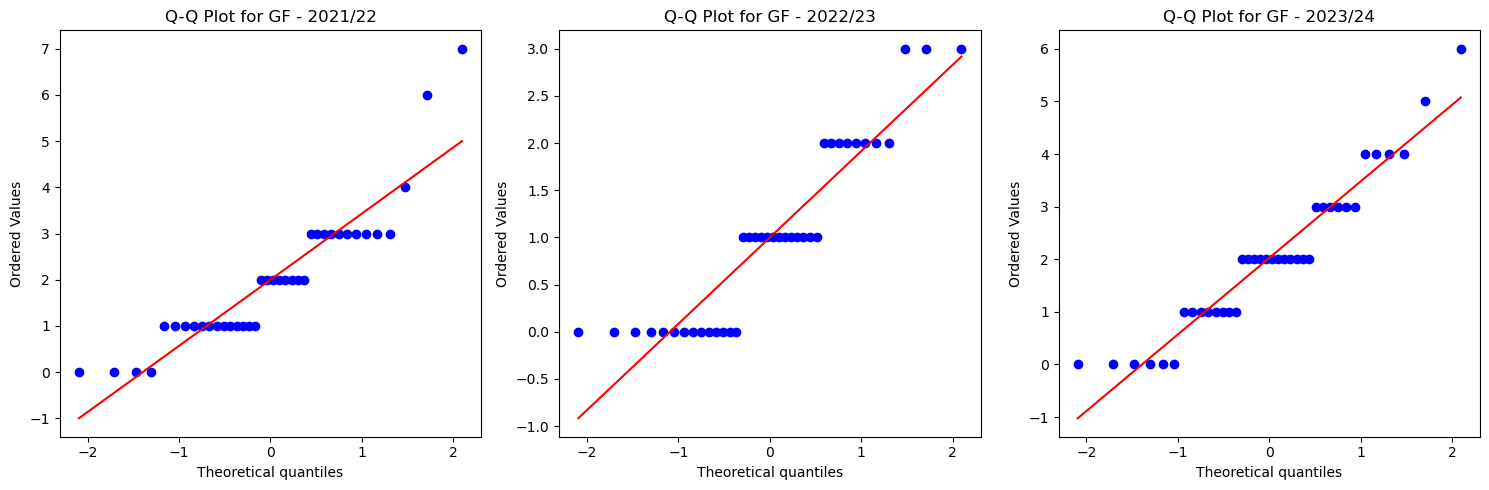

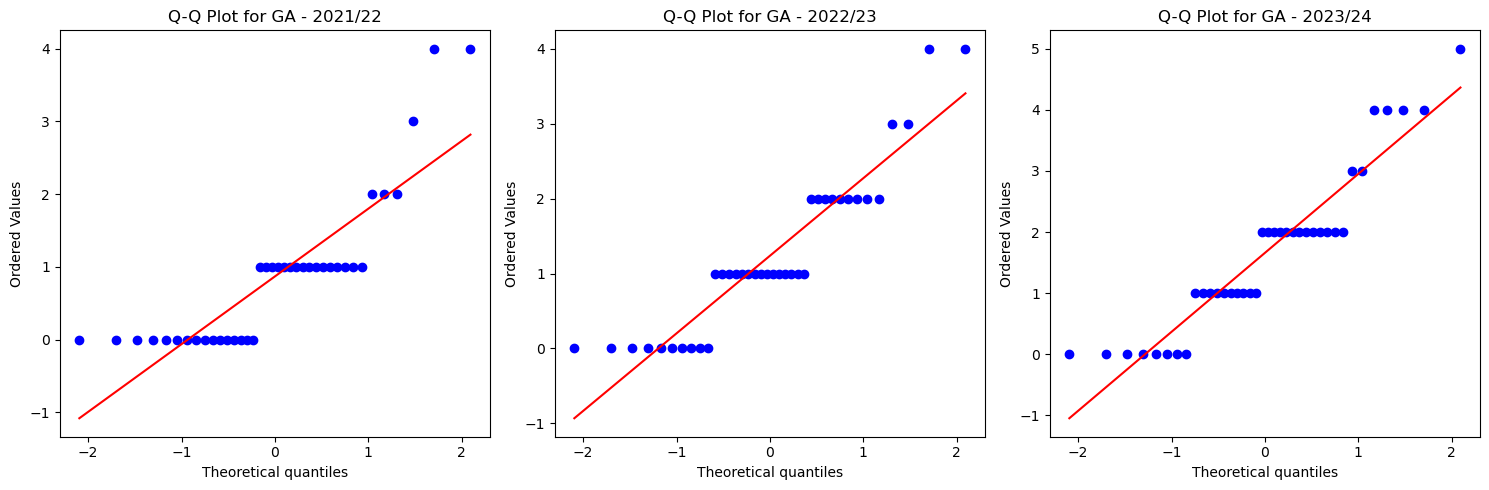

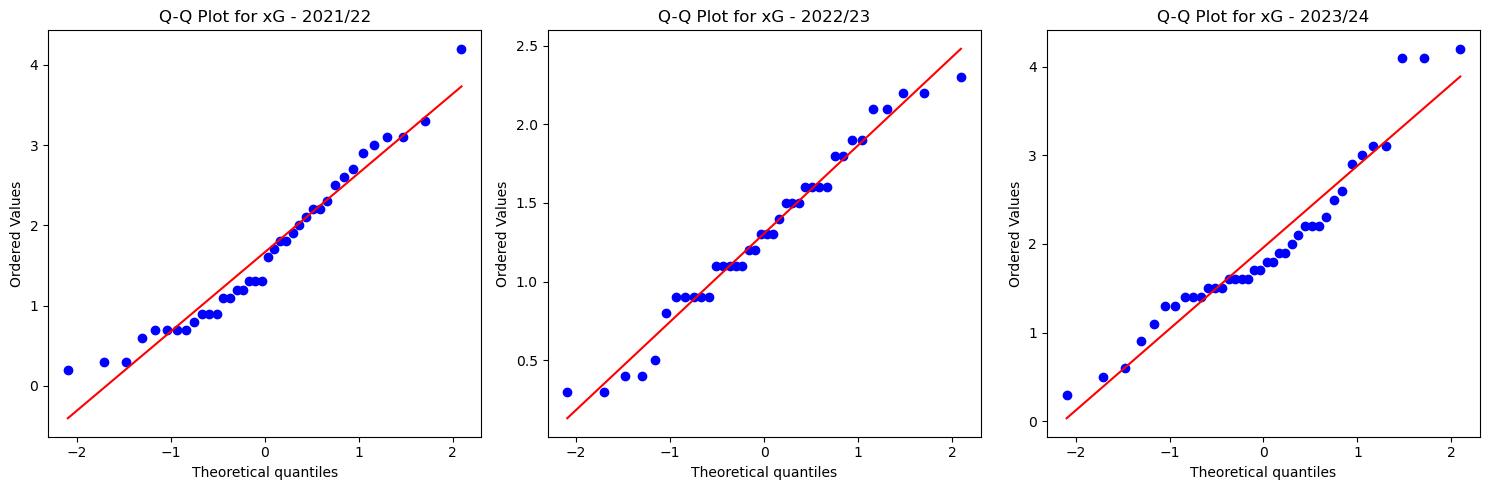

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming you have dataframes named matchstats_21_22, matchstats_22_23, matchstats_23_24
# Features to check for normality
features = ['GF', 'GA', 'xG']

# Q-Q plot function for compact layout
def qq_plot_compact(data_21_22, data_22_23, data_23_24, feature):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

    stats.probplot(data_21_22[feature], dist="norm", plot=axes[0])
    axes[0].set_title(f"Q-Q Plot for {feature} - 2021/22")

    stats.probplot(data_22_23[feature], dist="norm", plot=axes[1])
    axes[1].set_title(f"Q-Q Plot for {feature} - 2022/23")

    stats.probplot(data_23_24[feature], dist="norm", plot=axes[2])
    axes[2].set_title(f"Q-Q Plot for {feature} - 2023/24")

    plt.tight_layout()
    plt.show()

# Generate Q-Q plots for each feature across seasons in a compact layout
for feature in features:
    qq_plot_compact(matchstats_21_22, matchstats_22_23, matchstats_23_24, feature)


    

In [152]:
from scipy.stats import bartlett
import pandas as pd



# Select the columns you are interested in for GF, GA, xG
metrics = ['xG', 'GF', 'GA']

# Perform Bartlett's test for each metric
for metric in metrics:
    test_result = bartlett(matchstats_21_22[metric], matchstats_22_23[metric], matchstats_22_23[metric])
    print(f"Bartlett's test for {metric}: Statistic = {test_result.statistic}, p-value = {test_result.pvalue}")


Bartlett's test for xG: Statistic = 17.46051861170823, p-value = 0.00016162054163879855
Bartlett's test for GF: Statistic = 10.68551881264587, p-value = 0.004782655196206616
Bartlett's test for GA: Statistic = 0.044653518457801515, p-value = 0.9779206382447717


Correlation Matrix:
          GF        GA        xG
GF  1.000000 -0.146226  0.554260
GA -0.146226  1.000000 -0.141159
xG  0.554260 -0.141159  1.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\lenor\AppData\Local\Temp\ipykernel_10428\2635601300.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust layout to fit everything


<Figure size 600x600 with 0 Axes>

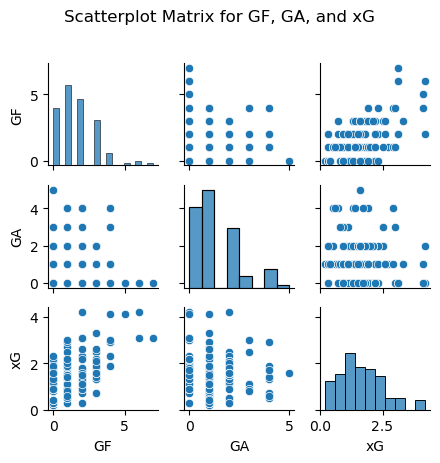

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine matchstats_21_22, matchstats_22_23, and matchstats_23_24 for testing
data = pd.concat([matchstats_21_22[['GF', 'GA', 'xG']],
                  matchstats_22_23[['GF', 'GA', 'xG']],
                  matchstats_23_24[['GF', 'GA', 'xG']]])

# Compute the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the scatterplot matrix with a smaller figure size
plt.figure(figsize=(6, 6))  # Adjust the size to make the plot smaller
sns.pairplot(data, height=1.5)
plt.suptitle("Scatterplot Matrix for GF, GA, and xG", y=1.02)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


In [157]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Combine matchstats_21_22, matchstats_22_23, and matchstats_23_24 for testing
data = pd.concat([matchstats_21_22[['GF', 'GA', 'xG']],
                  matchstats_22_23[['GF', 'GA', 'xG']],
                  matchstats_23_24[['GF', 'GA', 'xG']]])

# Adding a constant for the intercept in VIF calculation
data = sm.add_constant(data)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)


  feature       VIF
0   const  6.456747
1      GF  1.453319
2      GA  1.027325
3      xG  1.451160


Top 10 Features: ['G/SoT', 'GF', 'Save%', 'Gls', 'GA', 'G-xG', 'G/Sh', 'PSxG+/-', 'np:G-xG', 'Ast']
Evaluating model: SVM
Evaluating model: Multinomial Logistic Regression
Evaluating model: KNN


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluating model: Naive Bayes


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Results:
                                 accuracy  precision    recall        f1
SVM                              0.987500   0.991667  0.987500  0.987500
Multinomial Logistic Regression  0.917857   0.932292  0.917857  0.916548
KNN                              0.676786   0.725685  0.676786  0.668648
Naive Bayes                      0.735714   0.752083  0.735714  0.712024

Best Model: SVM


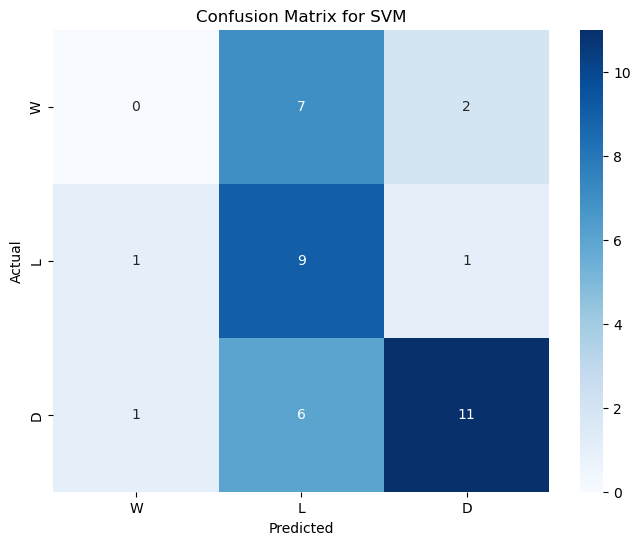

In [225]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier



# Combine datasets for training (assuming you already have matchstats_21_22, matchstats_22_23, matchstats_23_24)
common_features = matchstats_21_22.columns.intersection(matchstats_22_23.columns).intersection(matchstats_23_24.columns)

# Exclude irrelevant columns
features_to_exclude = ['Season', 'Date', 'Day', 'Captain', 'Result', 'Referee', 'Time', 'Round', 'Attendance']
all_features = common_features.difference(features_to_exclude)

# Prepare training and testing data
X = data[all_features]
y = data['Result']  # Assuming 'Result' is W, L, or D.

# Prepare testing data for 2023/24 season
X_test = matchstats_23_24[all_features]
y_test = matchstats_23_24['Result']

# OneHotEncoding for categorical variables
categorical_features = ['Venue', 'Opponent', 'Formation']  # Assuming these are the categorical variables
numeric_features = [col for col in all_features if col not in categorical_features]

# Define transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', rf)
])

# Fit the pipeline to data
pipeline.fit(X, y)

# Get feature importances from the Random Forest
rf_feature_importances = pipeline.named_steps['rf'].feature_importances_

# Combine feature names with their importances
feature_importance_dict = dict(zip(numeric_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()), rf_feature_importances))
sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Select top 10 features
top_features = [feature[0] for feature in sorted_features[:10]]
print(f"Top 10 Features: {top_features}")

# Define custom scorers for precision, recall, and f1
scorers = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Use only top features for training and testing (assuming you've already computed top_features)
X_top_features = X[top_features]
X_test_top_features = X_test[top_features]

# Stratified KFold Cross-Validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define models
models = {
    'SVM': SVC(class_weight='balanced'),
    'Multinomial Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

# Evaluate each model using cross-validation for multiple metrics
results = {}
for name, model in models.items():
    print(f"Evaluating model: {name}")
    results[name] = {}
    for metric_name, scorer in scorers.items():
        if name == 'SVM':
            grid_svm.fit(X_top_features, y)
            best_svm = grid_svm.best_estimator_
            score = cross_val_score(best_svm, X_top_features, y, cv=skf, scoring=scorer).mean()
        elif name == 'KNN':
            grid_knn.fit(X_top_features, y)
            best_knn = grid_knn.best_estimator_
            score = cross_val_score(best_knn, X_top_features, y, cv=skf, scoring=scorer).mean()
        else:
            score = cross_val_score(model, X_top_features, y, cv=skf, scoring=scorer).mean()
        results[name][metric_name] = score

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).T

# Display cross-validation results
print("Cross-Validation Results:")
print(results_df)

# Identify the best model based on accuracy
best_model_name = results_df['accuracy'].idxmax()

# Print the best model based on accuracy
print(f"\nBest Model: {best_model_name}")

# Train the best model on the full training dataset
best_model = models[best_model_name]
best_model.fit(X_top_features, y)

# Predict for the 2023/24 season
y_pred = best_model.predict(X_test_top_features)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['W', 'L', 'D'], yticklabels=['W', 'L', 'D'])
plt.title(f'Confusion Matrix for {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



